In [1]:
import networkx as nx
import collections
import matplotlib.pyplot as plt
%run Part-0-CA-Network.ipynb

## Comparison between graphs

In [2]:
def plot_simulation(graph, iteration_num = 50):
    x=list(range(0,iteration_num))
    records=np.array(graph.iteration(n = iteration_num))
    plt.plot(x, records[:,0].tolist(),label="healthy")
    plt.plot(x, records[:,1].tolist(),label="transmission")
    plt.plot(x, records[:,2].tolist(),label="immmune")
    plt.legend()
    plt.title("Simulation of {} Network".format(graph.name))
    return records

In [3]:
BA = social_network(name ="ba",alpha=0.1,beta=0.3, n = 4039)
facebook = social_network(name ="real",alpha=0.1,beta=0.3)
WS = social_network(name ="ws",alpha=0.1,beta=0.3, n = 4039)

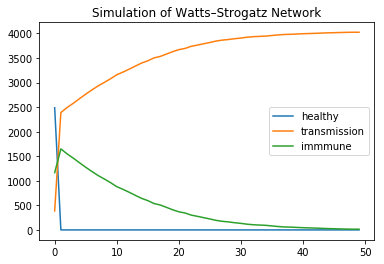

In [4]:
# simulation with a random WS graph
WSrecords = plot_simulation(social_network(name ="ws",alpha=0.1,beta=0.3, n = 4039))

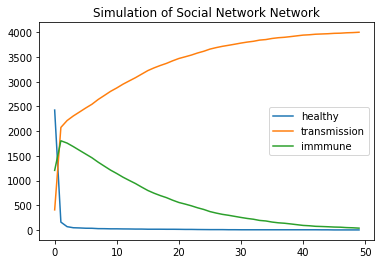

In [6]:
# simulation with the real social network data from facebook
RealRecords = plot_simulation(social_network(name ="real",alpha=0.1,beta=0.3), iteration_num = 50)

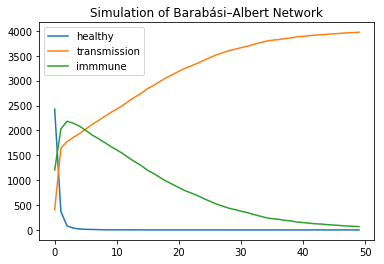

In [7]:
# simulation with a random BA graph
BArecords=plot_simulation(social_network(name ="ba",alpha=0.1,beta=0.3, n = 4039), iteration_num = 50)

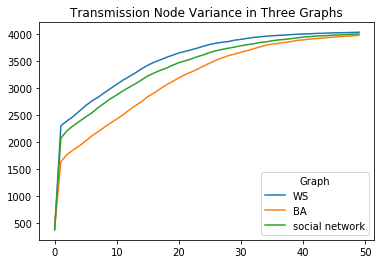

In [8]:
# Transmission Node Variance Comparison between the Three Graphs
iteration_num =50
x=list(range(0,iteration_num))

plt.plot(x, WSrecords[:,1].tolist(),label="WS")
plt.plot(x, BArecords[:,1].tolist(),label="BA")
plt.plot(x, RealRecords[:,1].tolist(),label="social network")
plt.legend(title="Graph",loc="best")
plt.title("Transmission Node Variance in Three Graphs")

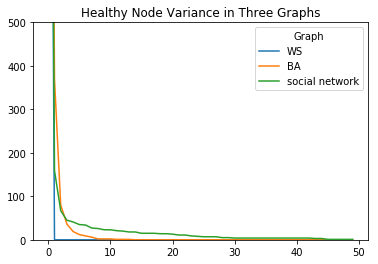

In [9]:
# Healthy Node Variance Comparison between the Three Graphsm
plt.ylim(0, 500)

plt.plot(x, WSrecords[:,0].tolist(),label="WS")
plt.plot(x, BArecords[:,0].tolist(),label="BA")
plt.plot(x, RealRecords[:,0].tolist(),label="social network")
plt.legend(title="Graph",loc="best")
plt.title("Healthy Node Variance in Three Graphs")

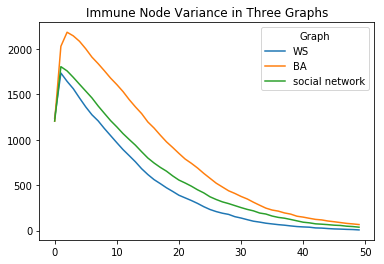

In [93]:
# Immune Node Variance Comparison between the Three Graphs
plt.plot(x, WSrecords[:,2].tolist(),label="WS")
plt.plot(x, BArecords[:,2].tolist(),label="BA")
plt.plot(x, RealRecords[:,2].tolist(),label="social network")
plt.legend(title="Graph",loc="best")
plt.title("Immune Node Variance in Three Graphs")

# Graph Degress Distribution Analysis

In [46]:
def read_graph(filename):
    G = nx.Graph()
    lines = [line.rstrip('\n') for line in open(filename, 'r')] 
    edge_list=list(map(lambda edge: [int(edge.split()[0]), int(edge.split()[1])], lines))
    G.add_edges_from(edge_list)
    return G

In [47]:
def print_graph_info(graph):
    print("Number of Nodes: ", graph.number_of_nodes())
    print("Number of Edges: ", graph.number_of_edges())
    print("Clustering Coefficient:", round(nx.average_clustering(graph),4))

In [80]:
def plot_graph_degree(graph, plot_title, ax_setting):
    degree_sequence = sorted([d for n, d in graph.degree().items()], reverse=True) 
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())
    num_nodes = graph.number_of_nodes()
    cnt = [i/num_nodes for i in cnt]
    
    fig, ax = plt.subplots()
    plt.bar(deg, cnt, width=0.80, color='b')
    
    plt.title(plot_title)
    plt.ylabel("p(K)")
    plt.xlabel("K")
    ax.set_xticks(ax_setting)
    ax.set_xticklabels(ax_setting)
    
    # draw graph in inset
    plt.axes([0.4, 0.4, 0.5, 0.5])
    Gcc = sorted(nx.connected_component_subgraphs(graph), key=len, reverse=True)[0]
    pos = nx.spring_layout(graph)
    plt.axis('off')
    nx.draw_networkx_nodes(graph, pos, node_size=1)
    nx.draw_networkx_edges(graph, pos, alpha=0.05)

    plt.show()

## Facebook Network

This dataset consists of 'circles' (or 'friends lists') from Facebook. Facebook data was collected from survey participants using this Facebook app. The dataset is available on https://snap.stanford.edu/data/ego-Facebook.html

In [83]:
fb_graph=read_graph("../data/facebook_combined.txt")

In [40]:
print_graph_info(fb_graph)

Number of Nodes:  4039
Number of Edges:  88234
Clustering Coefficient: 0.6055


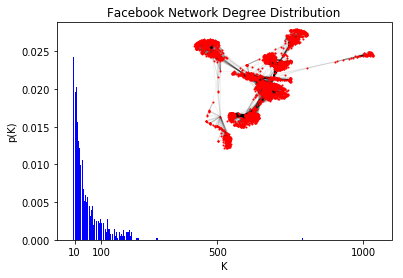

In [88]:
plot_graph_degree(fb_graph, "Facebook Network Degree Distribution",[1000, 500, 100, 10])

## WS Graph

The Watts–Strogatz model is a random graph generation model that produces graphs with small-world properties, including short average path lengths and high clustering.

In [48]:
ws_graph = nx.watts_strogatz_graph(n = 4039, k = 57, p = 0.5)

In [15]:
print_graph_info(ws_graph)

Number of Nodes:  4039
Number of Edges:  113092
Clustering Coefficient: 0.1014


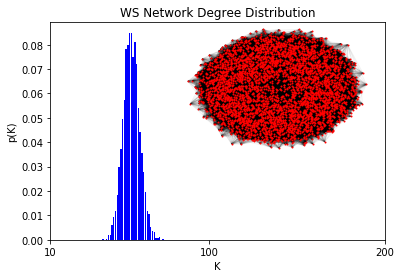

In [81]:
plot_graph_degree(ws_graph, "WS Network Degree Distribution", [200, 100, 10])

## BA Graph

The Barabási–Albert (BA) model is an algorithm for generating random scale-free networks using a preferential attachment mechanism. Several natural and human-made systems, including the Internet, the world wide web, citation networks, and some social networks are thought to be approximately scale-free and certainly contain few nodes (called hubs) with unusually high degree as compared to the other nodes of the network. The BA model tries to explain the existence of such nodes in real networks. 

In [90]:
ba_graph = nx.barabasi_albert_graph(n = 4039, m = 6)

In [91]:
print_graph_info(ba_graph)

Number of Nodes:  4039
Number of Edges:  24198
Clustering Coefficient: 0.0166


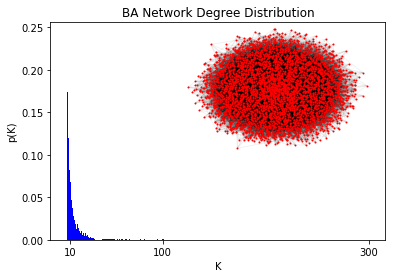

In [95]:
plot_graph_degree(ba_graph, "BA Network Degree Distribution", [300, 100, 10])